In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("orvile/inme-veri-seti-stroke-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [2]:
import os
data_dir_0 = '/kaggle/input/'
for root, dirs, files in os.walk(data_dir_0):
    print(root, len(files), 'files')

/kaggle/input/ 0 files
/kaggle/input/İNME VERİ SETİ 2 files
/kaggle/input/İNME VERİ SETİ/İnme Yok 4551 files
/kaggle/input/İNME VERİ SETİ/Kanama 0 files
/kaggle/input/İNME VERİ SETİ/Kanama/DICOM 1093 files
/kaggle/input/İNME VERİ SETİ/Kanama/OVERLAY 1093 files
/kaggle/input/İNME VERİ SETİ/Kanama/PNG 1093 files
/kaggle/input/İNME VERİ SETİ/YarısmaVeriSeti_2_Oturum 0 files
/kaggle/input/İNME VERİ SETİ/YarısmaVeriSeti_2_Oturum/DICOM 100 files
/kaggle/input/İNME VERİ SETİ/YarısmaVeriSeti_2_Oturum/OVERLAY 100 files
/kaggle/input/İNME VERİ SETİ/YarısmaVeriSeti_2_Oturum/MASKS 100 files
/kaggle/input/İNME VERİ SETİ/YarısmaVeriSeti_2_Oturum/PNG 97 files
/kaggle/input/İNME VERİ SETİ/İskemi 0 files
/kaggle/input/İNME VERİ SETİ/İskemi/DICOM 1130 files
/kaggle/input/İNME VERİ SETİ/İskemi/OVERLAY 1130 files
/kaggle/input/İNME VERİ SETİ/İskemi/PNG 1130 files
/kaggle/input/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum 1 files
/kaggle/input/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum/OVERLAY 200 files
/kaggle/in

In [3]:
!pip install tensorflow segmentation-models albumentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00


In [4]:
pip install --upgrade tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 95.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
E

In [5]:
!pip install tensorflow==2.17.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0


In [ ]:
import tensorflow as tf
from tensorflow import keras


In [7]:
!pip install segmentation-models 


In [8]:
import tensorflow as tf
print(tf.__version__)


2.17.0


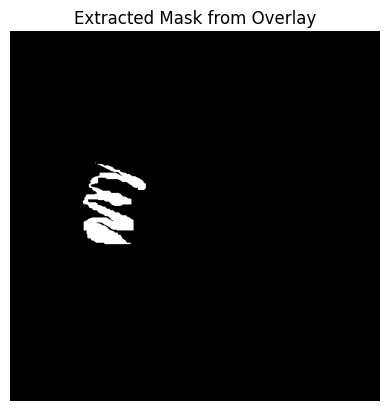

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def extract_red_mask(overlay_img_path):
    # Load image using PIL and convert to RGB
    img = Image.open(overlay_img_path).convert('RGB')
    img_np = np.array(img)

    # Convert RGB to HSV
    img_hsv = np.array(img.convert('HSV'))

    # Split HSV channels
    h, s, v = img_hsv[:, :, 0], img_hsv[:, :, 1], img_hsv[:, :, 2]

    # Define red mask in HSV (hue values in PIL range from 0 to 255)
    # Scale hue range: OpenCV [0-180] => PIL [0-255]
    lower_red1 = ((h >= 0) & (h <= 10 * 255 // 180)) & (s >= 100) & (v >= 100)
    upper_red2 = ((h >= 160 * 255 // 180) & (h <= 255)) & (s >= 100) & (v >= 100)

    red_mask = lower_red1 | upper_red2

    # Convert boolean mask to uint8 binary mask
    binary_mask = red_mask.astype(np.uint8)

    return binary_mask

# Example usage
mask = extract_red_mask("/kaggle/input/İNME VERİ SETİ/İskemi/OVERLAY/10003.png")
plt.imshow(mask, cmap='gray')
plt.title("Extracted Mask from Overlay")
plt.axis('off')
plt.show()


In [10]:
import os
from tqdm import tqdm
import cv2
def batch_convert_overlays_to_masks(overlay_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    overlay_files = [f for f in os.listdir(overlay_dir) if f.endswith('.png')]

    for fname in tqdm(overlay_files, desc="Converting overlays"):
        in_path = os.path.join(overlay_dir, fname)
        out_path = os.path.join(output_dir, fname)

        mask = extract_red_mask(in_path) * 255  # Convert 0/1 to 0/255
        cv2.imwrite(out_path, mask)

# Example
kanama_overlay_dir = "/kaggle/input/İNME VERİ SETİ/Kanama/OVERLAY"
iskemi_overlay_dir = "/kaggle/input/İNME VERİ SETİ/İskemi/OVERLAY"

kanama_mask_output = "/kaggle/working/converted_masks/kanama"
iskemi_mask_output = "/kaggle/working/converted_masks/iskemi"

batch_convert_overlays_to_masks(kanama_overlay_dir, kanama_mask_output)
batch_convert_overlays_to_masks(iskemi_overlay_dir, iskemi_mask_output)


Converting overlays: 100%|██████████| 1130/1130 [00:20<00:00, 56.30it/s]


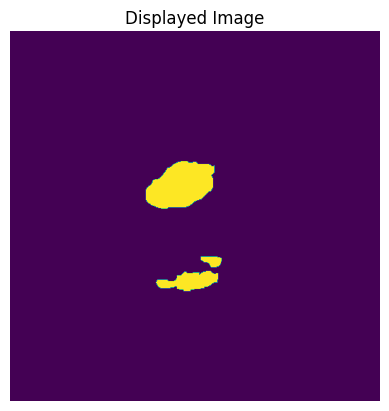

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image_path):
    # Open the image using PIL
    image = Image.open(image_path)
    
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axis ticks
    plt.title("Displayed Image")
    plt.show()

show_image("/kaggle/working/converted_masks/kanama/10033.png")



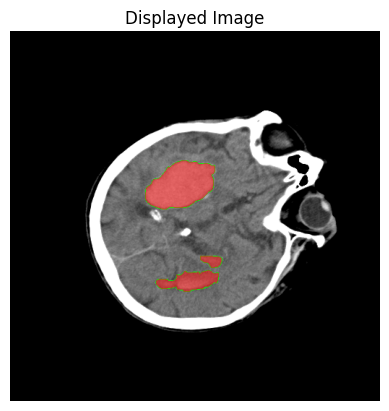

In [12]:
show_image("/kaggle/input/İNME VERİ SETİ/Kanama/OVERLAY/10033.png")


In [13]:
import os
import tensorflow as tf

def write_image_batches_to_tfr(
    img_filenames,
    label_filenames,
    filename: str = "batch",
    max_files: int = 100,
    out_dir: str = "/data/tfrecord/",
    augmentation=None,
    preprocessing=None
):
    os.makedirs(os.path.join(out_dir, filename), exist_ok=True)

    num_examples = len(img_filenames)
    num_shards = (num_examples + max_files - 1) // max_files

    print(f"Writing {num_examples} examples to {num_shards} TFRecord shards...")

    def create_example(image_path, label_path):
        image_data = tf.io.read_file(image_path)
        label_data = tf.io.read_file(label_path)

        image = tf.io.decode_png(image_data, channels=3)
        label = tf.io.decode_png(label_data, channels=3)

        # Resize to 512x512 and cast to float32
        image = tf.image.resize(image, [512, 512])
        label = tf.image.resize(label, [512, 512], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

        image = tf.cast(image, tf.float32)
        label = tf.cast(label, tf.float32)

        # Apply preprocessing or augmentation if any
        if preprocessing:
            image, label = preprocessing(image, label)
        if augmentation:
            image, label = augmentation(image, label)

        image_tensor = tf.io.serialize_tensor(image)
        label_tensor = tf.io.serialize_tensor(label)

        feature = {
            'image/raw_image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_tensor.numpy()])),
            'label/raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[label_tensor.numpy()])),
            'image/height': tf.train.Feature(int64_list=tf.train.Int64List(value=[512])),
            'image/width': tf.train.Feature(int64_list=tf.train.Int64List(value=[512])),
            'image/channels': tf.train.Feature(int64_list=tf.train.Int64List(value=[3])),
            'image/filename': tf.train.Feature(bytes_list=tf.train.BytesList(value=[os.path.basename(image_path).encode()])),
        }

        return tf.train.Example(features=tf.train.Features(feature=feature))

    for shard_id in range(num_shards):
        start_idx = shard_id * max_files
        end_idx = min((shard_id + 1) * max_files, num_examples)

        output_filename = os.path.join(out_dir, filename, f"{filename}_{shard_id:05d}.tfrecords")
        with tf.io.TFRecordWriter(output_filename, options="ZLIB") as writer:
            for i in range(start_idx, end_idx):
                example = create_example(img_filenames[i], label_filenames[i])
                writer.write(example.SerializeToString())

        print(f"✅ Wrote shard {shard_id+1}/{num_shards} with {end_idx - start_idx} examples")

    print("🎉 All TFRecords written!")


In [14]:
import os
import random
import tensorflow as tf

# Constants
BASE_PATH = "/kaggle/input/İNME VERİ SETİ"
KANAMA_IMG = os.path.join(BASE_PATH, "Kanama/PNG")
KANAMA_MASK = os.path.join("/kaggle/working/converted_masks", "kanama")
ISKEMI_IMG = os.path.join(BASE_PATH, "İskemi/PNG")
ISKEMI_MASK = os.path.join("/kaggle/working/converted_masks", "iskemi")
OUT_PATH = "./tfrecord_out/"
IMG_EXT = "png"
MAX_FILES = 600  # Per TFRecord shard
CLASS_VALUES = [1, 2]
CLASS_NAMES = ["Iskemik", "Hemorajik", "Unlabelled"]
ENCODING_TYPE = "ZLIB"


# Get image-label pairs
def get_image_label_pairs(image_dir, label_dir):
    images = tf.io.gfile.glob(f"{image_dir}/*.{IMG_EXT}")
    images.sort()
    labels = [img.replace(image_dir, label_dir) for img in images]
    return images, labels

# Combine ischemic and hemorrhagic sets
kanama_imgs, kanama_labels = get_image_label_pairs(KANAMA_IMG, KANAMA_MASK)
iskemi_imgs, iskemi_labels = get_image_label_pairs(ISKEMI_IMG, ISKEMI_MASK)
print(f"Found {len(kanama_imgs)} hemorrhagic images")
print(f"Found {len(iskemi_imgs)} ischemic images")


all_imgs = kanama_imgs + iskemi_imgs
all_labels = kanama_labels + iskemi_labels

# Shuffle and split
combined = list(zip(all_imgs, all_labels))
random.shuffle(combined)

train_ratio = 0.9
split_idx = int(len(combined) * train_ratio)
train_set = combined[:split_idx]
val_set = combined[split_idx:]

train_imgs, train_labels = zip(*train_set)
val_imgs, val_labels = zip(*val_set)

print(f"Train: {len(train_imgs)} | Val: {len(val_imgs)}")

# Write TFRecords
write_image_batches_to_tfr(
    train_imgs, train_labels, filename="train",
    max_files=MAX_FILES, out_dir=OUT_PATH,
    augmentation=None, preprocessing=None
)

write_image_batches_to_tfr(
    val_imgs, val_labels, filename="val",
    max_files=MAX_FILES, out_dir=OUT_PATH,
    augmentation=None, preprocessing=None
)


Found 1093 hemorrhagic images
Found 1130 ischemic images
Train: 2000 | Val: 223
Writing 2000 examples to 4 TFRecord shards...
✅ Wrote shard 1/4 with 600 examples
✅ Wrote shard 2/4 with 600 examples
✅ Wrote shard 3/4 with 600 examples
✅ Wrote shard 4/4 with 200 examples
🎉 All TFRecords written!
Writing 223 examples to 1 TFRecord shards...
✅ Wrote shard 1/1 with 223 examples
🎉 All TFRecords written!


In [15]:
train_tfrecords = tf.io.gfile.glob("/kaggle/working/tfrecord_out/train/*.tfrecords")
val_tfrecords = tf.io.gfile.glob("/kaggle/working/tfrecord_out/val/*.tfrecords")

In [16]:
print("Train:", len(train_tfrecords))
print("Val:", len(val_tfrecords))

Train: 4
Val: 1


In [17]:
def parse_example(example_proto):
    feature_description = {
        'image/raw_image': tf.io.FixedLenFeature([], tf.string),
        'label/raw': tf.io.FixedLenFeature([], tf.string),
    }

    parsed = tf.io.parse_single_example(example_proto, feature_description)

    # These were saved as float32 tensors in TFRecords
    image = tf.io.parse_tensor(parsed['image/raw_image'], out_type=tf.float32)
    label = tf.io.parse_tensor(parsed['label/raw'], out_type=tf.float32)

    # Reshape back to expected dimensions
    image = tf.reshape(image, [512, 512, 3])
    label = tf.reshape(label, [512, 512, 3])

    return image, label


In [18]:
def load_tfrecord_dataset(tfrecord_paths, batch_size=8, shuffle=True):
    dataset = tf.data.TFRecordDataset(tfrecord_paths, compression_type="ZLIB")

    # Use parse_example on each record
    dataset = dataset.map(parse_example, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset


In [19]:
import glob
print("All TFRecord files in working dir:", glob.glob("/kaggle/working/**/*.tfrecords", recursive=True))

All TFRecord files in working dir: ['/kaggle/working/tfrecord_out/val/val_00000.tfrecords', '/kaggle/working/tfrecord_out/train/train_00001.tfrecords', '/kaggle/working/tfrecord_out/train/train_00000.tfrecords', '/kaggle/working/tfrecord_out/train/train_00003.tfrecords', '/kaggle/working/tfrecord_out/train/train_00002.tfrecords']


In [20]:
def count_records(filenames):
    count = 0
    for fn in filenames:
        for _ in tf.data.TFRecordDataset(fn, compression_type="ZLIB"):
            count += 1
    return count


In [25]:
import os
import tensorflow as tf
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
import segmentation_models as sm
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# CONFIG
BACKBONE = 'resnet50'
sm.set_framework('tf.keras')
sm.framework()
LR = 1e-4
EPOCHS = 10
BATCH_SIZE = 2
# ✅ TFRecord Paths
train_filenames = tf.io.gfile.glob("/kaggle/working/tfrecord_out/train/*.tfrecords")
val_filenames = tf.io.gfile.glob("/kaggle/working/tfrecord_out/val/*.tfrecords")

print("Train TFRecords:", len(train_filenames), "| Val TFRecords:", len(val_filenames))
NUM_TRAIN = count_records(train_filenames)
NUM_VAL = count_records(val_filenames)

STEPS_PER_EPOCH = NUM_TRAIN // BATCH_SIZE
VAL_STEPS_PER_EPOCH = NUM_VAL // BATCH_SIZE

MODEL_SAVE_PATH = "/kaggle/working/models"
DATE_NAME = "combined_lovasz_focal"
N_CLASSES = 3  # 0 = background, 1 = ischemic, 2 = hemorrhagic
ACTIVATION = 'softmax'

    

# ✅ Dataset loader
def parse_example(example_proto):
    features = {
        'image/raw_image': tf.io.FixedLenFeature([], tf.string),
        'label/raw': tf.io.FixedLenFeature([], tf.string),
    }
    parsed = tf.io.parse_single_example(example_proto, features)
    image = tf.io.parse_tensor(parsed['image/raw_image'], out_type=tf.float32)
    label = tf.io.parse_tensor(parsed['label/raw'], out_type=tf.float32)
    image = tf.reshape(image, [512, 512, 3])
    label = tf.reshape(label, [512, 512, 3])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def load_dataset(filenames, batch_size=2, shuffle=True):
    dataset = tf.data.TFRecordDataset(filenames, compression_type="ZLIB")
    dataset = dataset.map(parse_example, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(1024)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset


# metrics
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# ✅ Datasets
train_dataset = load_dataset(train_filenames, BATCH_SIZE).repeat()
val_dataset = load_dataset(val_filenames, BATCH_SIZE, shuffle=False).repeat()

print(train_dataset.element_spec)
print(val_dataset.element_spec)

# ✅ Model
model = sm.Unet(BACKBONE, classes=N_CLASSES, activation=ACTIVATION)


# ✅ Callbacks
os.makedirs(f"{MODEL_SAVE_PATH}/{DATE_NAME}", exist_ok=True)
callbacks = [
    ModelCheckpoint(f"{MODEL_SAVE_PATH}/{DATE_NAME}/best.keras", save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(patience=3, factor=0.5),
    CSVLogger(f"/content/{DATE_NAME}_training.csv")
]





Train TFRecords: 4 | Val TFRecords: 1
(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None))
(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None))


In [26]:
NUM_TRAIN

2000

In [27]:
from segmentation_models.losses import DiceLoss

# Define loss
loss = DiceLoss()


In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(LR),
    loss=loss,  # your custom loss
    metrics=metrics
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=VAL_STEPS_PER_EPOCH,
    callbacks=callbacks
)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 281s 214ms/step - f1-score: 0.5701 - iou_score: 1.9832 - loss: 0.3834 - val_f1-score: 0.6303 - val_iou_score: 1.6663 - val_loss: 0.3700 - learning_rate: 1.0000e-04
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 213s 209ms/step - f1-score: 0.6442 - iou_score: 2.5701 - loss: 0.3566 - val_f1-score: 0.6394 - val_iou_score: 4.1348 - val_loss: 0.3609 - learning_rate: 1.0000e-04
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 213s 206ms/step - f1-score: 0.6446 - iou_score: 3.0025 - loss: 0.3557 - val_f1-score: 0.6378 - val_iou_score: 5.5130 - val_loss: 0.3623 - learning_rate: 1.0000e-04
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 216s 206ms/step - f1-score: 0.6474 - iou_score: 3.1340 - loss: 0.3528 - val_f1-score: 0.6280 - val_iou_score: 3.8335 - val_loss: 0.3722 - learning_rate: 1.0000e-04
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 215s 206ms/step - f1-score: 0.6485 - iou_score: 3.2010 - loss: 0.3517 - val_f1-score: 0.6280 - val_iou_score: 2.5877 - val_loss: 0.372

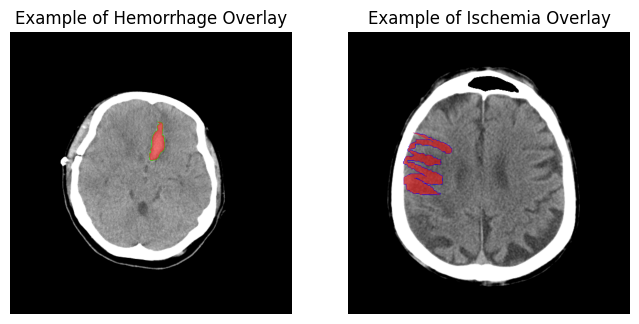

In [16]:
import matplotlib.pyplot as plt
import cv2

# Load images
image1_path = "/kaggle/input/İNME VERİ SETİ/Kanama/OVERLAY/10002.png"
image2_path = "/kaggle/input/İNME VERİ SETİ/İskemi/OVERLAY/10003.png"

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Convert from BGR to RGB (since OpenCV loads images in BGR format)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Display images
ax[0].imshow(image1)
ax[0].axis("off")
ax[0].set_title("Example of Hemorrhage Overlay")

ax[1].imshow(image2)
ax[1].axis("off")
ax[1].set_title("Example of Ischemia Overlay")

# Show the plot
plt.savefig("/kaggle/working/Example_Overlay.png")
plt.show()